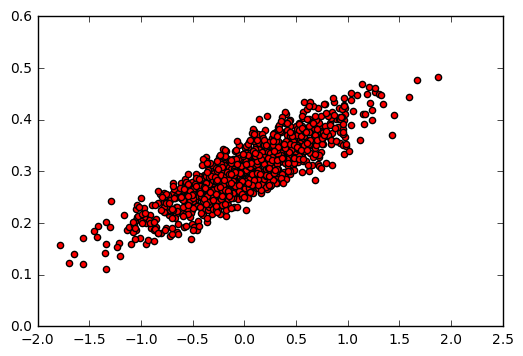

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 随机生成1000个点，围绕在y=0.1x+0.3的直线周围
num_points = 1000
vectors_set = []
for i in range(num_points):
    x1 = np.random.normal(0.0, 0.55)
    y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    vectors_set.append([x1, y1])

# 生成一些样本
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

plt.scatter(x_data,y_data,c='r')
plt.show()

In [4]:
# 生成1维的W矩阵，取值是[-1,1]之间的随机数
with tf.name_scope('weight'):
    W = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='W')
# 生成1维的b矩阵，初始值是0
with tf.name_scope('bias'):
    b = tf.Variable(tf.zeros([1]), name='b')
# 经过计算得出预估值y
with tf.name_scope('y'):
    y = W * x_data + b

# 以预估值y和实际值y_data之间的均方误差作为损失
with tf.name_scope('loss'):
    loss = tf.reduce_mean(tf.square(y - y_data), name='loss')
# 采用梯度下降法来优化参数
optimizer = tf.train.GradientDescentOptimizer(0.5)
# 训练的过程就是最小化这个误差值
train = optimizer.minimize(loss, name='train')

sess = tf.Session()

init = tf.global_variables_initializer()
sess.run(init)

# 初始化的W和b是多少
print ("W =", sess.run(W), "b =", sess.run(b), "loss =", sess.run(loss))
# 执行20次训练
for step in range(20):
    sess.run(train)
    # 输出训练好的W和b
    print ("W =", sess.run(W), "b =", sess.run(b), "loss =", sess.run(loss))
writer = tf.train.SummaryWriter("logs/", sess.graph)

W = [ 0.33527207] b = [ 0.] loss = 0.104051
W = [ 0.27314326] b = [ 0.29449064] loss = 0.00983059
W = [ 0.22196499] b = [ 0.29603973] loss = 0.00535701
W = [ 0.18581694] b = [ 0.29731578] loss = 0.00312445
W = [ 0.16028048] b = [ 0.29821706] loss = 0.00201028
W = [ 0.14224048] b = [ 0.29885375] loss = 0.00145424
W = [ 0.12949628] b = [ 0.29930356] loss = 0.00117674
W = [ 0.12049324] b = [ 0.29962131] loss = 0.00103825
W = [ 0.11413313] b = [ 0.29984578] loss = 0.000969141
W = [ 0.10964008] b = [ 0.30000436] loss = 0.000934649
W = [ 0.106466] b = [ 0.30011639] loss = 0.000917436
W = [ 0.10422371] b = [ 0.30019554] loss = 0.000908845
W = [ 0.10263965] b = [ 0.30025145] loss = 0.000904558
W = [ 0.10152061] b = [ 0.30029094] loss = 0.000902419
W = [ 0.10073008] b = [ 0.30031884] loss = 0.000901351
W = [ 0.10017161] b = [ 0.30033854] loss = 0.000900818
W = [ 0.09977709] b = [ 0.30035248] loss = 0.000900552
W = [ 0.09949838] b = [ 0.30036232] loss = 0.000900419
W = [ 0.09930149] b = [ 0.3003

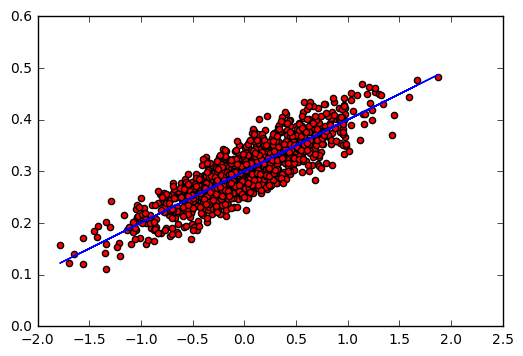

In [3]:
plt.scatter(x_data,y_data,c='r')
plt.plot(x_data,sess.run(W)*x_data+sess.run(b))
plt.show()